## Opinet - 셀프주유소가 정말 저렴할까?

In [2]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

#### 1. 셀레니움으로 서울시 구별 주유소 가격정보 얻기

In [3]:
# Opinet 초기화면 > 싼 주유소 찾기 > 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)           # 타이밍 에러날 수 있음으로 항상 텀주기!

In [4]:
# 광역시도에서 서울 입력
metro = driver.find_element(By.ID, 'SIDO_NM0')
metro.send_keys('서울')

In [5]:
# 서울시 자치구 리스트 가져오기
sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="8ba42ff0097904a50127adc6a4c2b302", element="69AA4F073FADB9D90B47C32D958DAAAE_element_98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8ba42ff0097904a50127adc6a4c2b302", element="69AA4F073FADB9D90B47C32D958DAAAE_element_100")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8ba42ff0097904a50127adc6a4c2b302", element="69AA4F073FADB9D90B47C32D958DAAAE_element_102")>]

In [6]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [7]:
gu_names = [gu.text for gu in gu_list[1:]]
gu_names[:3]

['강남구', '강동구', '강북구']

In [8]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [9]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()
time.sleep(2)
"""
엑셀저장 HTML
<a class="btn_type6_ex_save" href="javascript:fn_excel_download('os_btn');
" id="glopopd_excel" title="새창열림:엑셀저장"><span>엑셀저장</span></a>
"""

'\n엑셀저장 HTML\n<a class="btn_type6_ex_save" href="javascript:fn_excel_download(\'os_btn\');\n" id="glopopd_excel" title="새창열림:엑셀저장"><span>엑셀저장</span></a>\n'

In [10]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 가격정보 엑셀 저장
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)

In [11]:
driver.close()

#### 2. 구별 휘발유 가격에 대한 정리

In [27]:
# glob: 디렉토리 밑에 있는 파일을 리스트로 나타냄
from glob import glob
glob('c:/Users/human/Downloads/지역*.xls')

['c:/Users/human/Downloads\\지역_위치별(주유소) (1).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (10).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (11).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (12).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (13).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (14).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (15).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (16).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (17).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (18).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (19).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (2).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (20).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (21).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (22).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (23).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (24).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (3).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (4).xls',
 'c:/Users/human/Downloads\\지역_위치별(

![Alt text](image-11.png)

In [28]:
# conda activate base; pip install xlrd
filename = 'c:/Users/human/Downloads\\지역_위치별(주유소) .xls'
df = pd.read_excel(filename, header=2)          #header=2 : 두줄을 건너띄어라
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1769,1668,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1978,1788,1688,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,2025,1795,1735,-


df.list(
    [df1, df2, ... df25]
    pd.concat(dt+list)

In [29]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []       
for filename in glob('c:/Users/human/Downloads/지역*.xls'):
    df = pd.read_excel(filename, header=2)
    df_list.append(df)

In [30]:
df = pd.concat(df_list)
df.shape

(439, 10)

In [31]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스


In [32]:
# 인덱스가 각 파일마다 0~25.. , 0~ 33.... 인덱스 정리가 안된 상태 (439가 나와야함..)
df.tail()               

,상호,주소,가격,셀프,상표
29,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지
30,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [33]:
df['구'] = df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크,강동구
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스,강동구


In [34]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [35]:
# 서울소재 전체 주소의 인덱스를  상호기준으로 인덱스 순서 재셋팅
df.set_index('상호', inplace=True)
df.reset_index(inplace=True)
df.tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [36]:
# 가격의 타입확인
type(df.가격[0])

numpy.int64

In [37]:
df.to_csv('data/opinet_2023.09.19.csv', index=False)
pd.read_csv('data/opinet_2023.09.19.csv')

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크,강동구
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스,강동구
...,...,...,...,...,...,...
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구


##### 3. 셀프주유소가 정말 저렴할까?

In [38]:
df.pivot_table('가격', '셀프', aggfunc =['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,172,1948.372093,1694,2776,217.620387,47358.632667
Y,267,1800.925094,1724,2278,54.626775,2984.084594


- 셀프 여부에 따른 가격의 Boxplot

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

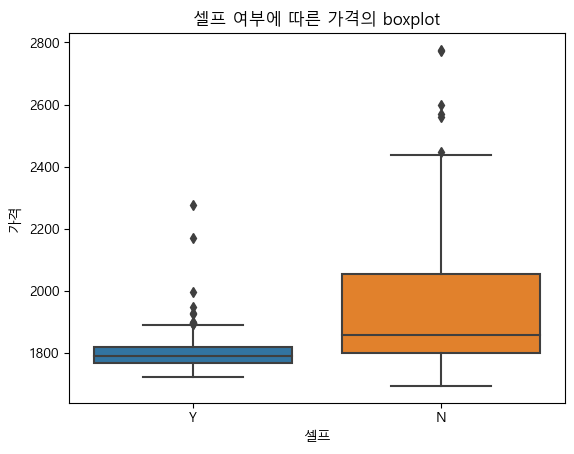

In [40]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프 여부에 따른 가격의 boxplot');

↑ 이렇게 하면 셀프주유소가 더 싸다고는 할 수 있지만,
통계학적으로는 더 싸다고 할 수 없음.
통계학적으로 설명하기 위해서는 가설검정을 해야함

### 가설 검정( 통계 자료로 사용할 경우 )
- H0(하이퍼 시스) : 귀무 가설 (A == B)
    -(통계학에서 처음부터 버릴 것을 예상하는 가설, 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설)

- H1, Ha : 대립가설 (A != B)
    - 어떤 가능성에 대해 확률적인 가설검정을 할 때 귀무가설과 함께 사용된다. 이 가설은 귀무가설처럼 검정을 직접 수행하기는 불가능하며 귀무가설을 기각함으로써 받아들여지는 반증의 과정을 거쳐 받아들여질 수 있음.)

- T -test (정규분포와 비슷)로 할수 있는것
    - 검정 통계량
    - P-value < 0.05 보다 작으면 대립가설 Ha를 채택
    - P-value > 0.05 보다 크면 귀무가설 Ho를 채택
        - 1-sample T test
        - 2-sample T test




![Alt text](image-12.png)
![Alt text](image-13.png)

- 가설검정(2-sample T test)

In [43]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프=='Y'].가격, df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-8.710850568947652, pvalue=1.6733753870177818e-15)

In [42]:
# p-value가 0.05보다 훨씬 작으므로 귀무가설 기각, 대립가설 체택
#   - 귀무가설(H0): 셀프주유소와 일반주유소의 가격 차이가 없다.
#   - 대립가설(H1): 셀프주유소와 일반주유소의 가격 차이가 있다.

- 상표별로 가격 비교하기

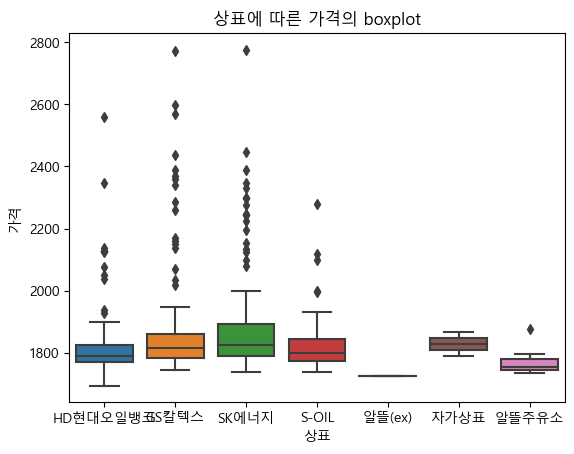

In [44]:
sns.boxplot(df, x='상표', y='가격')
plt.title('상표에 따른 가격의 boxplot');

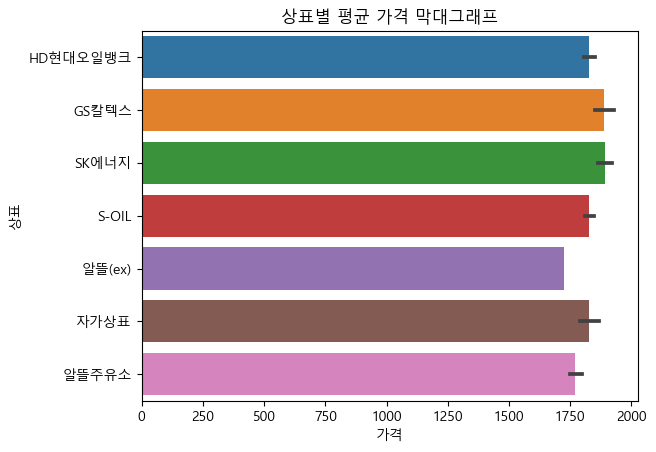

In [57]:
# 상표별 평균 가격의 막대 그래프
sns.barplot(df, y='상표', x='가격')
plt.title('상표별 평균 가격 막대그래프')
plt.show()

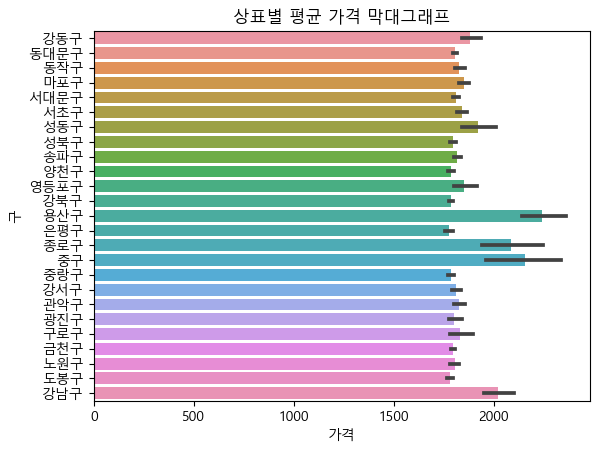

In [55]:
# 구별 가격 비교
sns.barplot(df, y='구', x='가격')
plt.title('상표별 평균 가격 막대그래프')
plt.show()